In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
import tensorflow as tf 
#----------------------------------------
from io import StringIO
from PIL import Image
import glob
import os
import sys
import numpy as np
import pandas as pd 
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
# training_path = 'dataset/training_set'
# test_path =  'dataset/test_set/'
training_path = 'Validation Dataset/training_set'
test_path =  'Validation Dataset/test_set/'


In [86]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(training_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 208372 images belonging to 579 classes.
Found 32260 images belonging to 579 classes.


In [93]:

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 579, activation = tf.nn.softmax))

# Compiling the CNN
classifier.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [94]:
import datetime
import scipy.ndimage
start = time.time()
classifier.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 20,
                         validation_data = test_set,
                         nb_val_samples = 2000)
classifier.save_weights('OpenImageV4_train_v1.h5')
end=time.time()-start
print('Total Time= ', str(datetime.timedelta(end)))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=250, epochs=20, validation_steps=2000)`
  


Epoch 1/20
250/250 [==============================] - 246s 984ms/step - loss: 4.6068 - acc: 0.0684 - val_loss: 4.2788 - val_acc: 0.0984
Epoch 2/20
250/250 [==============================] - 232s 927ms/step - loss: 4.2440 - acc: 0.1111 - val_loss: 4.1004 - val_acc: 0.1375
Epoch 3/20
250/250 [==============================] - 227s 909ms/step - loss: 4.1157 - acc: 0.1409 - val_loss: 4.0589 - val_acc: 0.1539
Epoch 4/20
250/250 [==============================] - 217s 869ms/step - loss: 4.0107 - acc: 0.1628 - val_loss: 4.0693 - val_acc: 0.1406
Epoch 5/20
250/250 [==============================] - 206s 823ms/step - loss: 3.9318 - acc: 0.1677 - val_loss: 3.8942 - val_acc: 0.1864
Epoch 6/20
250/250 [==============================] - 198s 791ms/step - loss: 3.9391 - acc: 0.1781 - val_loss: 3.9114 - val_acc: 0.1740
Epoch 7/20
250/250 [==============================] - 193s 772ms/step - loss: 3.9045 - acc: 0.1799 - val_loss: 3.8686 - val_acc: 0.1925
Epoch 8/20
250/250 [============================

In [95]:
end/3600

1.038251644174258

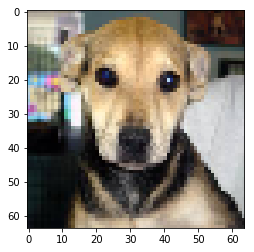

In [96]:
img_path = 'dataset/training_set/dogs/dog.4.jpg'
import cv2
img=plt.imread(img_path)
img = cv2.resize(img, (64, 64))
plt.imshow(img)

In [97]:
img= np.expand_dims(img, axis=0)
classifier.predict(img)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [70]:
x = classifier.predict_classes(img)[0]

In [98]:
pre_class = training_set.class_indices
pre_class

{'011k07': 0,
 '012074': 1,
 '0120dh': 2,
 '01226z': 3,
 '012n7d': 4,
 '012w5l': 5,
 '012xff': 6,
 '012ysf': 7,
 '0130jx': 8,
 '0138tl': 9,
 '013y1f': 10,
 '01432t': 11,
 '014j1m': 12,
 '014sv8': 13,
 '014trl': 14,
 '014y4n': 15,
 '0152hh': 16,
 '01599': 17,
 '015h_t': 18,
 '015p6': 19,
 '015qbp': 20,
 '015qff': 21,
 '015wgc': 22,
 '015x4r': 23,
 '015x5n': 24,
 '0162_1': 25,
 '0167gd': 26,
 '016m2d': 27,
 '0174k2': 28,
 '0174n1': 29,
 '0175cv': 30,
 '0176mf': 31,
 '017ftj': 32,
 '018j2': 33,
 '018p4k': 34,
 '018xm': 35,
 '01940j': 36,
 '0199g': 37,
 '019dx1': 38,
 '019h78': 39,
 '019jd': 40,
 '019w40': 41,
 '01_5g': 42,
 '01_bhs': 43,
 '01b638': 44,
 '01b7fy': 45,
 '01b9xk': 46,
 '01bfm9': 47,
 '01bjv': 48,
 '01bl7v': 49,
 '01bms0': 50,
 '01bqk0': 51,
 '01btn': 52,
 '01c648': 53,
 '01cmb2': 54,
 '01d380': 55,
 '01d40f': 56,
 '01dws': 57,
 '01dwsz': 58,
 '01dwwc': 59,
 '01dxs': 60,
 '01dy8n': 61,
 '01f8m5': 62,
 '01f91_': 63,
 '01fb_0': 64,
 '01fdzj': 65,
 '01fh4r': 66,
 '01g317': 67,
 